In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
import random 
%matplotlib inline
from itertools import chain

In [2]:
# Load a CSV file
def load_csv(filename):
	file = open(filename, "r")
	lines = reader(file)
	dataset = list(lines)
	return dataset


In [4]:
def take_second(elem):
    return elem[1]

In [5]:
def get_sidebar(std, n, N): 
    return std * np.sqrt((1/n)) * np.sqrt(1 - (n/N))

In [6]:
def chunk_it(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

In [4]:
# Load dataset
filename = 'Datasets/cancer.txt'
dataset = load_csv(filename)
N = len(dataset)
print('Loaded data file {0} with {1} rows and {2} columns').format(filename, len(dataset), len(dataset[0]))

Loaded data file Datasets/cancer.txt with 301 rows and 2 columns


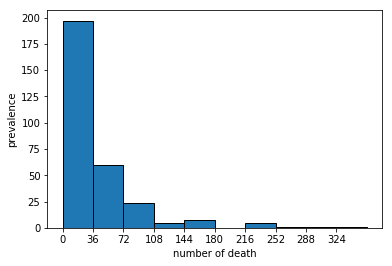

In [8]:
# Histogram of the mortality
mortality = [int(col[0]) for col in dataset] 
population = [int(col[1]) for col in dataset]
mortality_pop = [(int(col[0]), int(col[1])) for col in dataset]
fig, ax = plt.subplots()
n_bins = 10
n, bins, patches = plt.hist(mortality, bins=n_bins, edgecolor='black')
plt.xticks(np.arange(min(bins), max(bins), max(mortality)/n_bins))
plt.xlabel('number of death')
plt.ylabel('prevalence')
plt.savefig("hist_mort.png")

In [9]:
# population mean and total cancer mortality, population variance and standard deviation
mort_mean = np.mean(mortality)
ttl_cancer_mort = np.sum(mortality)
mort_var = np.var(mortality)
mort_std = np.std(mortality)
print(mort_mean, ttl_cancer_mort, mort_var, mort_std)

(39.857142857142854, 11997, 2590.1025154247745, 50.89304977523723)


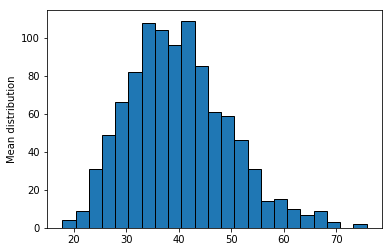

In [22]:
# sampling distribution of mean of a sample of 25 observations of mortality
means = np.zeros([1000, 1])
for i in range(0, 1000):  # we are sampling 100 times and using it to get the dist. of mean
    means[i] = np.mean(random.sample(mortality, 25, ))

fig, ax = plt.subplots()
n, bins, patches = plt.hist(means, bins='auto', edgecolor='black')
plt.ylabel('Mean distribution') 
plt.savefig("mean_dit.png")

In [101]:
# drawing a simple sample and using it for estimating mean as well as total cancer mortalit
def get_statistics(sample_size, N):
    simple_sample = random.sample(mortality, sample_size)
    mean_ss = np.mean(simple_sample)
    total_mort_ss = N*mean_ss
    std_ss = np.std(simple_sample)
    var_ss = np.var(simple_sample)
    return [mean_ss, total_mort_ss, std_ss, var_ss]

In [102]:
# computing statistics
[mean_25, total_mort_25, std_25, var_25] = get_statistics(25,N)
print(mean_25, total_mort_25, std_25, var_25)
[mean_100, total_mort_100, std_100, var_100] = get_statistics(100,N)
print(mean_100, total_mort_100, std_100, var_100)

(42.84, 12894.84, 57.49342918977785, 3305.4944)
(38.76, 11666.76, 51.44300146764378, 2646.3824)


In [29]:
# Computing confidence intervals
side_bar_25 = get_sidebar(std_25, 25, N)
CI_25 = [mean_25 - 1.96*side_bar_25, mean_25 + 1.96*side_bar_25]
print(CI_25)
print(np.multiply(CI_25, N))
side_bar_100 = get_sidebar(std_100, 100, N)
CI_100 = [mean_25 - 1.96*side_bar_100, mean_25 + 1.96*side_bar_100]
print(CI_100)
print(np.multiply(CI_100, N))

[17.556326568339088, 55.96367343166091]
[ 5284.45429707 16845.06570293]
[27.980592156871772, 45.539407843128224]
[ 8422.15823922 13707.36176078]


In [23]:
# Stratification
mortality_pop.sort(key=take_second)


In [111]:
random.random()
strata_num = 4
stratified = chunk_it(mortality_pop, strata_num)
samples_num = 6
samples = np.zeros((strata_num, samples_num), dtype=[('x', 'int'), ('y', 'int')])
mean_samples, ttl_samples = [np.zeros(strata_num) for _ in range(2)] 
for i in range(0, len(stratified)):
    samples[i] = random.sample(stratified[i], samples_num)
    mean_samples[i] = np.mean([col[0] for col in samples[i]])
    ttl_samples[i] = np.sum([col[0] for col in samples[i]])

print(np.mean(mean_samples))
print(N*np.mean(mean_samples))

30.875
9293.375


In [116]:
# optimal and proportional allocation

# initializing 
ttl_samples = 24
samples_num_propor = int(ttl_samples/strata_num)
samples_opt = [[] for i in range(strata_num)]
samples_propor = [[]*samples_num]*strata_num
mean_samples_opt = np.zeros(strata_num)
mean_samples_proper = np.zeros(strata_num)
samples_in_strata = np.zeros(strata_num)
std_samples = np.zeros(strata_num)
num_of_people = np.zeros(strata_num)


# compute sigma for each stratum and sum of it
for index in range(0, len(stratified)):
    std_samples[index] = np.std([col[0] for col in stratified[index]])
sum_std = np.sum(np.multiply(std_samples, 1/strata_num))
# sample and estimate mean
for i in range(0, len(stratified)):
    samples_in_strata[i] = round(ttl_samples*(1/strata_num)*std_samples[i]/sum_std)
    samples_opt[i].append(random.sample(stratified[i], int(samples_in_strata[i])))
    samples_propor[i] = random.sample(stratified[i], int(ttl_samples/strata_num))
    mean_samples_opt[i] = np.mean([col[0] for col in samples_opt[i][0]])
    mean_samples_proper[i] = np.mean([col[0] for col in samples_propor[i]])

print(np.var(mean_samples), np.var(mean_samples_opt), np.var(mean_samples_proper))

(581.6024305555555, 3178.245370370371, 4208.729166666667)
